In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt 

In [16]:
df = pd.read_csv("D:\Project\Fraud_detectiom\creditcard_2023.csv" )
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Admin\AppData\Local\Temp\ipykernel_21500\1488522907.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Project\Fraud_detectiom\creditcard_2023.csv" )


id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.296503 -0.248052 -0.064512   6531.37      0  
2 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.515950 -0.165316  0.048424   5384.44      0  
4  1.071126  0.023712  0.419117  14278.97      0  

[5 rows x 31 columns]

In [17]:
df.fillna(df.mean(), inplace=True)

In [18]:
X=df.drop(['id','Class'], axis=1, errors='ignore')
y = df['Class']   

In [19]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(454904, 29)

In [22]:
X_test.shape

(113726, 29)

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


In [26]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

In [27]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [28]:
y_pred = rf_model.predict(X_test_scaled)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



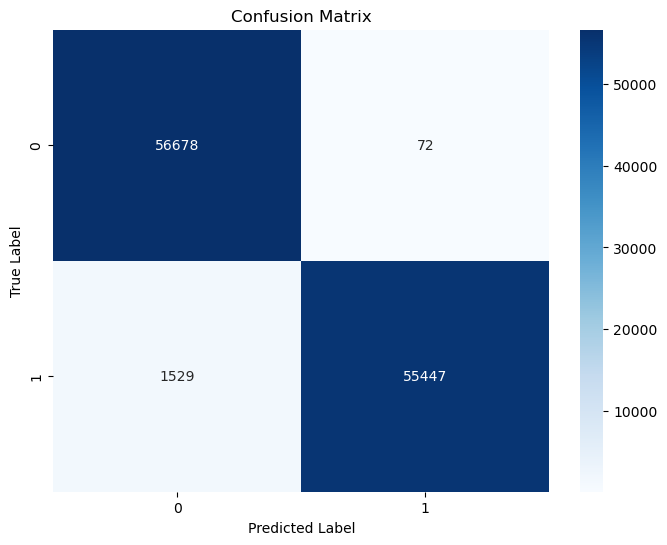

In [30]:
plt.figure(figsize=(8,6))
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con,annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [31]:
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({'Feature' : X.columns, 'Importance' : importance}).sort_values('Importance', ascending=False)

In [32]:
feature_imp.head()

Feature  Importance
9      V10    0.171750
3       V4    0.159210
13     V14    0.145847
11     V12    0.114395
10     V11    0.089935

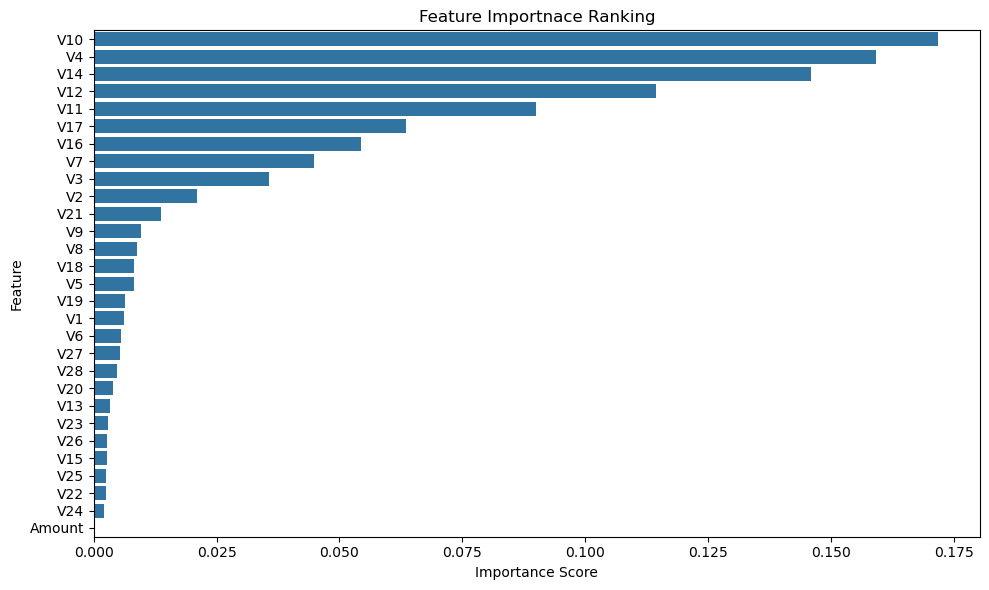

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp, x='Importance', y='Feature')
plt.title('Feature Importnace Ranking')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

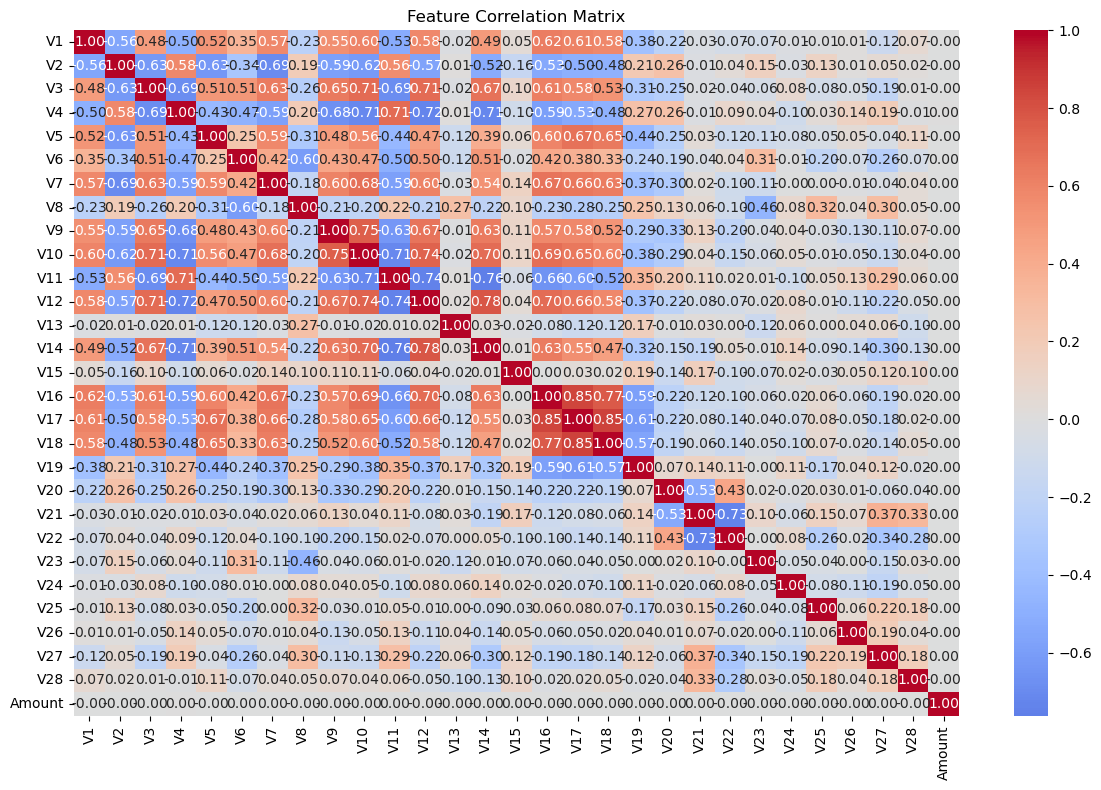

In [34]:
plt.figure(figsize=(12,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [35]:
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:,1]
fpr,tpr,_=roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

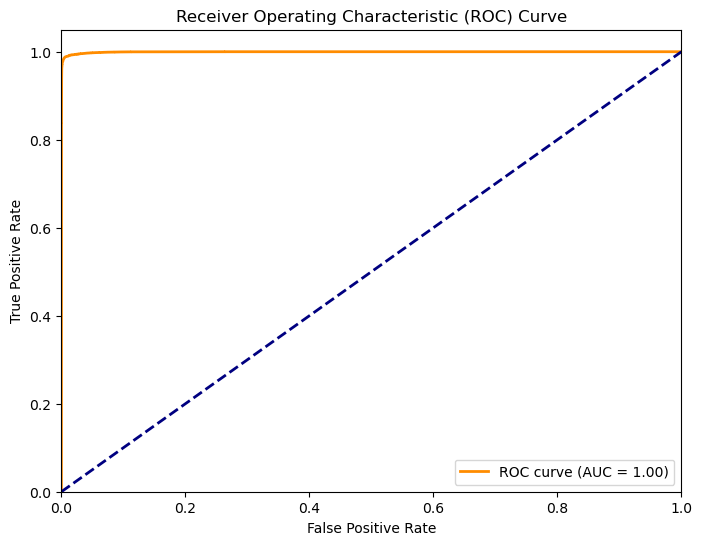

In [36]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [37]:
import joblib

joblib.dump(rf_model, 'rf_fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']